Chapter 24
# PageRank算法
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

In [2]:
directed_G = nx.DiGraph()
# 创建有向图的实例

In [3]:
directed_G.add_nodes_from(['a', 'b', 'c', 'd', 'e', 'f'])
# 添加多个顶点

In [4]:
# 添加几组有向边
directed_G.add_edges_from([('a','b'),('a','c'),('a','d'),
                           ('a','e'),('a','f')])
directed_G.add_edges_from([('b','d'),('b','e')])
directed_G.add_edges_from([('c','a'),('c','d'),('c','e')])
directed_G.add_edges_from([('d','b'),('d','e')])
directed_G.add_edges_from([('e','a')])
directed_G.add_edges_from([('f','b'),('f','c'),('f','e')])

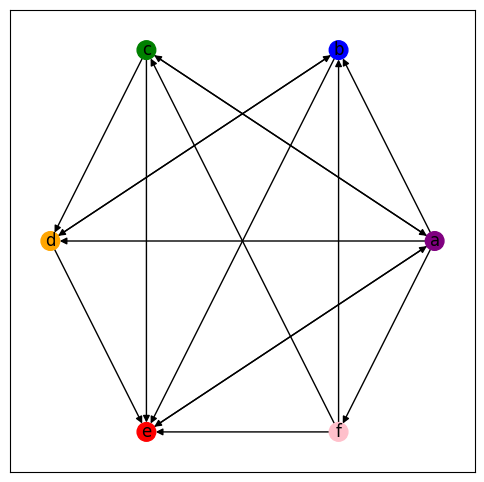

In [5]:
pos = nx.circular_layout(directed_G)
node_color = ['purple', 'blue', 'green', 'orange', 'red', 'pink']

# 可视化
plt.figure(figsize = (6,6))
nx.draw_networkx(directed_G, 
                 pos = pos,
                 node_color = node_color,
                 node_size = 180)
plt.savefig('网页之间关系的有向图.svg')

In [6]:
# 邻接矩阵
A = nx.adjacency_matrix(directed_G).todense()
A

array([[0, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 0],
       [1, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0]], dtype=int32)

In [7]:
list(directed_G.nodes)

['a', 'b', 'c', 'd', 'e', 'f']

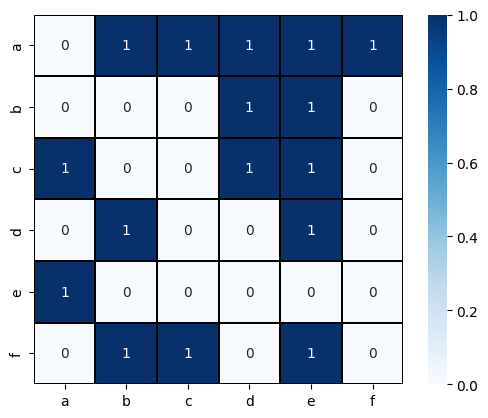

In [8]:
sns.heatmap(A, cmap = 'Blues', 
            annot = True, fmt = '.0f',
            xticklabels = list(directed_G.nodes), 
            yticklabels = list(directed_G.nodes),
            linecolor = 'k', square = True,
            linewidths = 0.2)
plt.savefig('邻接矩阵.svg')

## 转移矩阵

In [14]:
deg_out = A.sum(axis=1)[:, np.newaxis]
# 节点出度

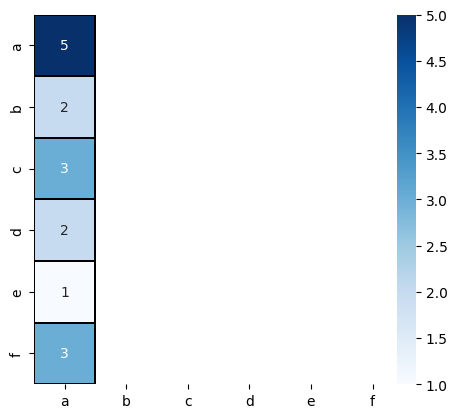

In [17]:
sns.heatmap(deg_out, cmap = 'Blues', 
            annot = True, fmt = '.0f',
            xticklabels = list(directed_G.nodes), 
            yticklabels = list(directed_G.nodes),
            linecolor = 'k', square = True,
            linewidths = 0.2)
plt.savefig('节点出度.svg')

In [18]:
T_T = A /  deg_out
# 邻接矩阵的行归一化

In [10]:
T = T_T.T
# 转置获得转移矩阵

In [11]:
T.sum(axis = 0)

array([1., 1., 1., 1., 1., 1.])

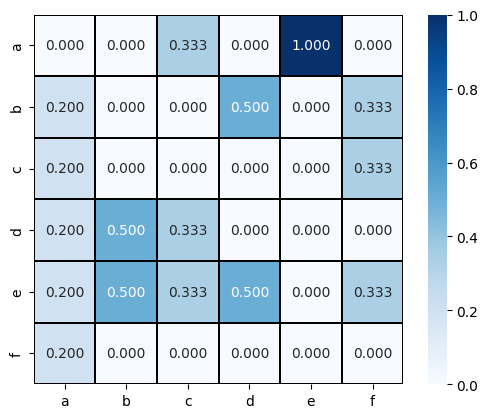

In [12]:
sns.heatmap(T, cmap = 'Blues', 
            annot = True, fmt = '.3f',
            xticklabels = list(directed_G.nodes), 
            yticklabels = list(directed_G.nodes),
            linecolor = 'k', square = True,
            linewidths = 0.2)
plt.savefig('转移矩阵.svg')

## 幂迭代

In [19]:
# 自定义函数幂迭代

def power_iteration(T_, num_iterations: int, L2_norm = False):
    
    # 初始状态
    r_k = np.ones((len(T_),1))/len(T_)
    r_k_iter = r_k

    for _ in range(num_iterations):
        
        # 矩阵乘法 T @ r
        r_k1 = T_ @ r_k
        
        if L2_norm:
            # 计算L2范数
            r_k1_norm = np.linalg.norm(r_k1)

            # L2范数单位化
            r_k = r_k1 / r_k1_norm
        else:
            # 归一化
            r_k = r_k1 / r_k1.sum()
        
        # 记录迭代过程结果
        r_k_iter = np.column_stack((r_k_iter,r_k))

    return r_k,r_k_iter

In [20]:
# 调用自行函数完成幂迭代
r_k,r_k_iter = power_iteration(T, 20)

In [21]:
r_k

array([[0.28662424],
       [0.1571125 ],
       [0.0764331 ],
       [0.16135882],
       [0.2611465 ],
       [0.05732483]])

['a', 'b', 'c', 'd', 'e', 'f']

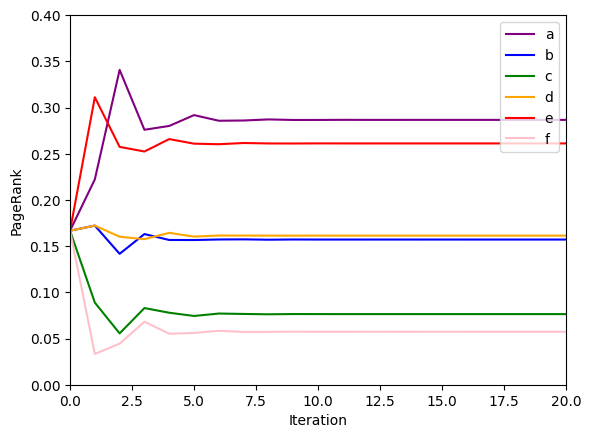

In [26]:
# 可视化幂迭代过程

fig, ax = plt.subplots()
for i,node_i in zip(range(len(node_color)),list(directed_G.nodes)):
    ax.plot(r_k_iter[i,:], color = node_color[i], label = node_i)
ax.set_xlim(0,20)
ax.set_ylim(0,0.4)
ax.set_xlabel('Iteration')
ax.set_ylabel('PageRank')
ax.legend(loc = 'upper right')
plt.savefig('幂迭代.svg')

## 特征值分解

In [16]:
eigenValues, eigenVectors = np.linalg.eig(T)

idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

In [17]:
eigenValues

array([ 1.00000000e+00+0.j        , -4.33680869e-17+0.j        ,
       -5.30003573e-02+0.j        , -2.23499821e-01+0.39961234j,
       -2.23499821e-01-0.39961234j, -5.00000000e-01+0.j        ])

In [18]:
v0 = eigenVectors[:,0]
v0 = v0.real
# -v0/np.linalg.norm(v0)
v0/v0.sum()

array([0.2866242 , 0.15711253, 0.07643312, 0.16135881, 0.2611465 ,
       0.05732484])

## 修改有向图

In [45]:
directed_G_2 = directed_G.copy()
directed_G_2.remove_edge('e','a')

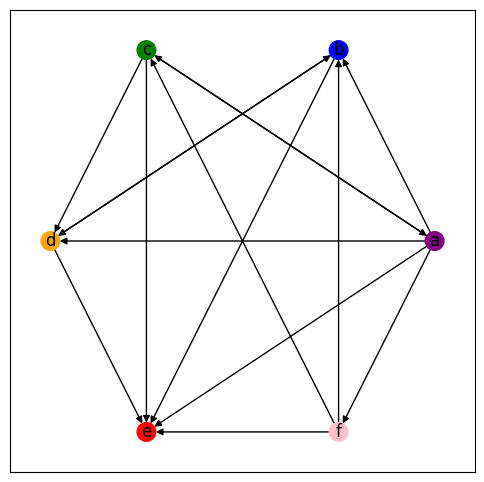

In [46]:
# 可视化
plt.figure(figsize = (6,6))
nx.draw_networkx(directed_G_2, 
                 pos = pos,
                 node_color = node_color,
                 node_size = 180)

In [47]:
A_2 = nx.adjacency_matrix(directed_G_2).todense()

In [62]:
A_2

array([[0, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 0],
       [1, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0]], dtype=int32)

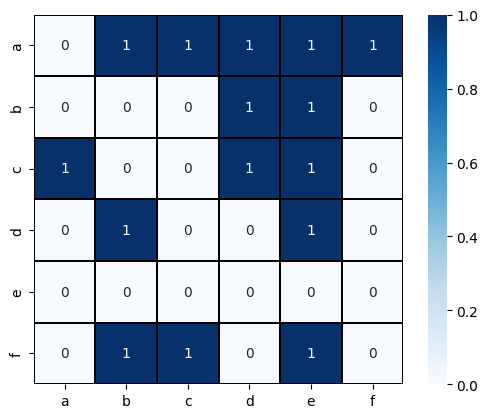

In [60]:
sns.heatmap(A_2, cmap = 'Blues', 
            annot = True, fmt = '.0f',
            xticklabels = list(directed_G.nodes), 
            yticklabels = list(directed_G.nodes),
            linecolor = 'k', square = True,
            linewidths = 0.2)
plt.savefig('邻接矩阵，删除ea.svg')

In [48]:
def A_2_T(A):
    T_T = A /  A.sum(axis=1)[:, np.newaxis]
    T = T_T.T
    T[np.isnan(T)] = 0
    return T

T_2 = A_2_T(A_2)

C:\Users\james\AppData\Local\Temp\ipykernel_9644\1677233325.py:2: RuntimeWarning: invalid value encountered in true_divide
  T_T = A /  A.sum(axis=1)[:, np.newaxis]


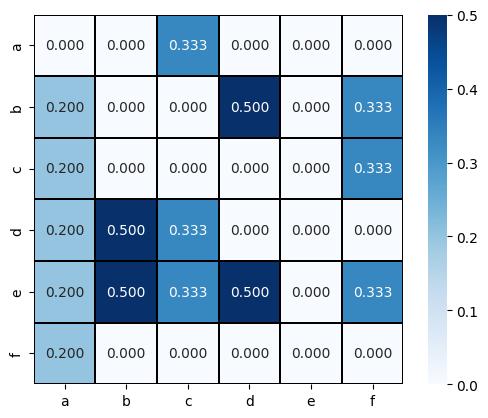

In [61]:
sns.heatmap(T_2, cmap = 'Blues', 
            annot = True, fmt = '.3f',
            xticklabels = list(directed_G.nodes), 
            yticklabels = list(directed_G.nodes),
            linecolor = 'k', square = True,
            linewidths = 0.2)
plt.savefig('转移矩阵，删除ea.svg')

## 幂迭代修正

In [42]:
# 幂迭代，修正

def power_iteration_adjust(T_, num_iterations: int, d = 0.85, 
                           tol=1e-6, L2_norm = False):
    
    n = len(T_)
    # 初始状态
    r_k = np.ones((len(T_),1))/n
    r_k_iter = r_k

    # 幂迭代过程
    for _ in range(num_iterations):
        
        # 核心迭代计算式
        r_k1 = d * T_ @ r_k + (1-d)/n 

        # 检测是否收敛
        if np.linalg.norm(r_k - r_k1, 1) < tol:
            break

        if L2_norm:
            # 计算L2范数
            r_k1_norm = np.linalg.norm(r_k1)

            # L2范数单位化
            r_k = r_k1 / r_k1_norm
        else:
            # 归一化
            r_k = r_k1 / r_k1.sum()
        
        # 记录迭代过程结果
        r_k_iter = np.column_stack((r_k_iter,r_k))

    return r_k,r_k_iter

In [49]:
r_k_adj,r_k_iter_adj = power_iteration_adjust(T_2, 20, 0.85)

In [50]:
r_k_adj

array([[0.06822847],
       [0.21109448],
       [0.07597197],
       [0.2168053 ],
       [0.37422838],
       [0.05367139]])

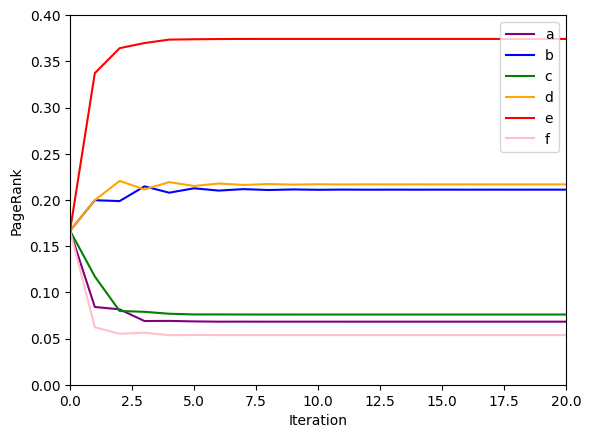

In [52]:
# 可视化幂迭代过程

fig, ax = plt.subplots()
for i,node_i in zip(range(len(node_color)),list(directed_G.nodes)):
    ax.plot(r_k_iter_adj[i,:], color = node_color[i], label = node_i)
ax.set_xlim(0,20)
ax.set_ylim(0,0.4)
ax.set_xlabel('Iteration')
ax.set_ylabel('PageRank')
ax.legend(loc = 'upper right')
plt.savefig('幂迭代，修正.svg')